In [37]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import pandas as pd
df = pd.read_csv("nba_2022-23_all_stats_with_salary.csv")
df_add = pd.read_csv("all_seasons.csv")
df.rename(columns=lambda x: x.strip(), inplace=True)
df_add.rename(columns=lambda x: x.strip(), inplace=True)


 # Basic information
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     467 non-null    int64  
 1   Player Name    467 non-null    object 
 2   Salary         467 non-null    int64  
 3   Position       467 non-null    object 
 4   Age            467 non-null    int64  
 5   Team           467 non-null    object 
 6   GP             467 non-null    int64  
 7   GS             467 non-null    int64  
 8   MP             467 non-null    float64
 9   FG             467 non-null    float64
 10  FGA            467 non-null    float64
 11  FG%            466 non-null    float64
 12  3P             467 non-null    float64
 13  3PA            467 non-null    float64
 14  3P%            454 non-null    float64
 15  2P             467 non-null    float64
 16  2PA            467 non-null    float64
 17  2P%            463 non-null    float64
 18  eFG%      

In [39]:
df.head()

,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


In [40]:
print("All columns in your DataFrame:")
print(df.columns.tolist())


All columns in your DataFrame:
['Unnamed: 0', 'Player Name', 'Salary', 'Position', 'Age', 'Team', 'GP', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Total Minutes', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']


In [41]:
df.drop('Unnamed: 0', axis=1, inplace=True)


In [42]:
df.head()


,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


In [43]:
df_add.drop('Unnamed: 0', axis=1, inplace=True)


In [44]:
df_add.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


 Data Preprocessing

In [45]:


def show_missing_columns(df):
    missing_values = df.isnull().sum()
    missing_columns = missing_values[missing_values > 0]
    for column, count in missing_columns.items():
        print(f"{column}: {count} missing values")




print("The missing values in the nba_2022-23_all_stats_with_salary.csv")
show_missing_columns(df)
print("The missing values in the all_seasons.csv")
show_missing_columns(df_add)







The missing values in the nba_2022-23_all_stats_with_salary.csv
FG%: 1 missing values
3P%: 13 missing values
2P%: 4 missing values
eFG%: 1 missing values
FT%: 23 missing values
TS%: 1 missing values
3PAr: 1 missing values
FTr: 1 missing values
The missing values in the all_seasons.csv
college: 1854 missing values


for the first :giving 0 vaalue to the null values aa it is considered that the player didn't score 
for the scond dtata set giving the value "unkown" to the missing values in attribute college , as missing college might mean the player is international or went directly to the NBA.

In [46]:
# List of columns with missing values
missing_cols = ['FG%', '3P%', '2P%', 'eFG%', 'FT%', 'TS%', '3PAr', 'FTr']

# Create a DataFrame of True/False for missing values in those columns
missing_matrix = df[missing_cols].isnull()

# Add a column counting how many missing entries per row
missing_matrix['Missing_Count'] = missing_matrix.sum(axis=1)

# Show rows where there's at least one missing value
rows_with_missing = missing_matrix[missing_matrix['Missing_Count'] > 0]
print(rows_with_missing)



       FG%    3P%    2P%   eFG%    FT%    TS%   3PAr    FTr  Missing_Count
75   False   True  False  False  False  False  False  False              1
133  False   True  False  False  False  False  False  False              1
221  False  False  False  False   True  False  False  False              1
233  False   True  False  False  False  False  False  False              1
247  False  False  False  False   True  False  False  False              1
254  False  False  False  False   True  False  False  False              1
264  False   True  False  False  False  False  False  False              1
301  False   True  False  False  False  False  False  False              1
332  False   True  False  False  False  False  False  False              1
344  False  False  False  False   True  False  False  False              1
356  False  False  False  False   True  False  False  False              1
358  False  False  False  False   True  False  False  False              1
393  False  False  False 

entweder mittlere wert oder random foerst null ersetzen 

In [47]:


rows_with_more_than_4_missing = df[missing_matrix['Missing_Count'] > 5]
print(rows_with_more_than_4_missing)

          Player Name  Salary Position  Age Team  GP  GS   MP   FG  FGA  ...  \
436  Alondes Williams  254446       SG   23  BRK   1   0  5.0  0.0  0.0  ...   

      TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM   BPM  VORP  
436  100.0  17.7 -0.1  0.0 -0.1 -0.517 -21.3  -5.2 -26.5   0.0  

[1 rows x 51 columns]


so wi will remove this row 436  as it has 8 missing values

In [48]:
df.drop(index=436, inplace=True) 

In [49]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
from sklearn.experimental import enable_iterative_imputer  # Enable experimental imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor


# Select only numerical features (since imputer requires numerical data)
numeric_data = df.select_dtypes(include='number')

# Create the imputer using a Random Forest regressor to model relationships
imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0)

# Apply the imputer to fill in missing values
imputed_array = imputer.fit_transform(numeric_data)

# Replace original numerical columns with the imputed values directly in df
df[numeric_data.columns] = imputed_array


In [51]:
print("The missing values in the nba_2022-23_all_stats_with_salary.csv")
show_missing_columns(df)

The missing values in the nba_2022-23_all_stats_with_salary.csv


To handle missing values in key numerical features such as shooting percentages (FG%, 3P%, FT%, etc.), we used an ML-based imputation strategy. Specifically, an IterativeImputer was applied using a RandomForestRegressor as the internal estimator.
This approach leverages patterns in the data by predicting missing values based on other correlated numerical features, offering more intelligent imputations than simple mean or median replacement.
The original df dataset was updated in place with the imputed values, allowing us to continue further analysis and modeling without interruption or data loss.



In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 0 to 466
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player Name    466 non-null    object 
 1   Salary         466 non-null    float64
 2   Position       466 non-null    object 
 3   Age            466 non-null    float64
 4   Team           466 non-null    object 
 5   GP             466 non-null    float64
 6   GS             466 non-null    float64
 7   MP             466 non-null    float64
 8   FG             466 non-null    float64
 9   FGA            466 non-null    float64
 10  FG%            466 non-null    float64
 11  3P             466 non-null    float64
 12  3PA            466 non-null    float64
 13  3P%            466 non-null    float64
 14  2P             466 non-null    float64
 15  2PA            466 non-null    float64
 16  2P%            466 non-null    float64
 17  eFG%           466 non-null    float64
 18  FT             

In [53]:
from sklearn.feature_selection import mutual_info_regression
# Select numerical features only (exclude Salary itself from X)
X = df.select_dtypes(include='number').drop(columns=['Salary'])
y = df['Salary']

# Compute mutual information scores
mi_scores = mutual_info_regression(X, y, random_state=0)

# Create a DataFrame for easy analysis
mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)
mi_df

,Feature,MI_Score
26,Total Minutes,0.394673
40,DWS,0.389875
25,PTS,0.388333
3,MP,0.376412
4,FG,0.359398
46,VORP,0.344828
1,GP,0.344432
5,FGA,0.338156
2,GS,0.333850
23,TOV,0.322120


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\DELL\AppData\Local\Temp\ipykernel_20432\1603203476.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MI_Score', y='Feature', data=mi_df, palette='crest')


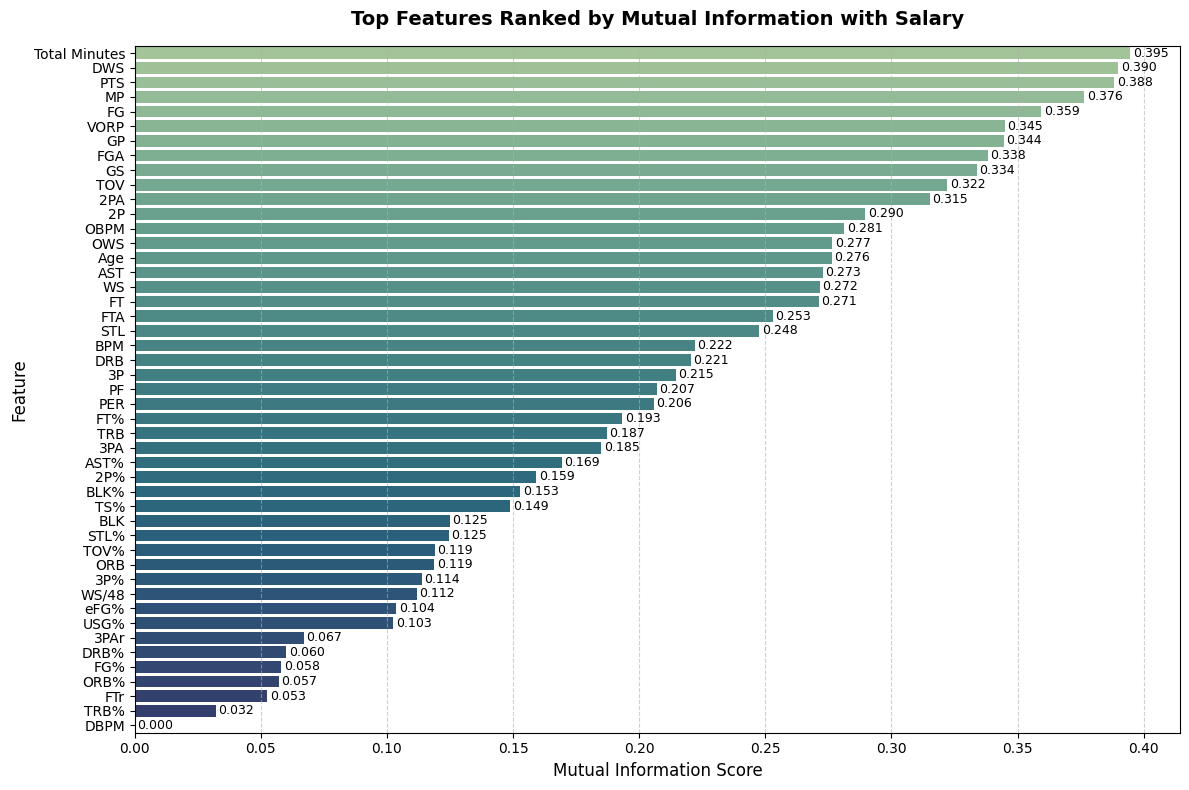

In [55]:
# Plot with enhancements
plt.figure(figsize=(12, 8))
sns.barplot(x='MI_Score', y='Feature', data=mi_df, palette='crest')

plt.title('Top Features Ranked by Mutual Information with Salary',
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Optional: Add value labels to bars
for i, score in enumerate(mi_df['MI_Score']):
    plt.text(score + 0.001, i, f'{score:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_20432\1052036053.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='crest')


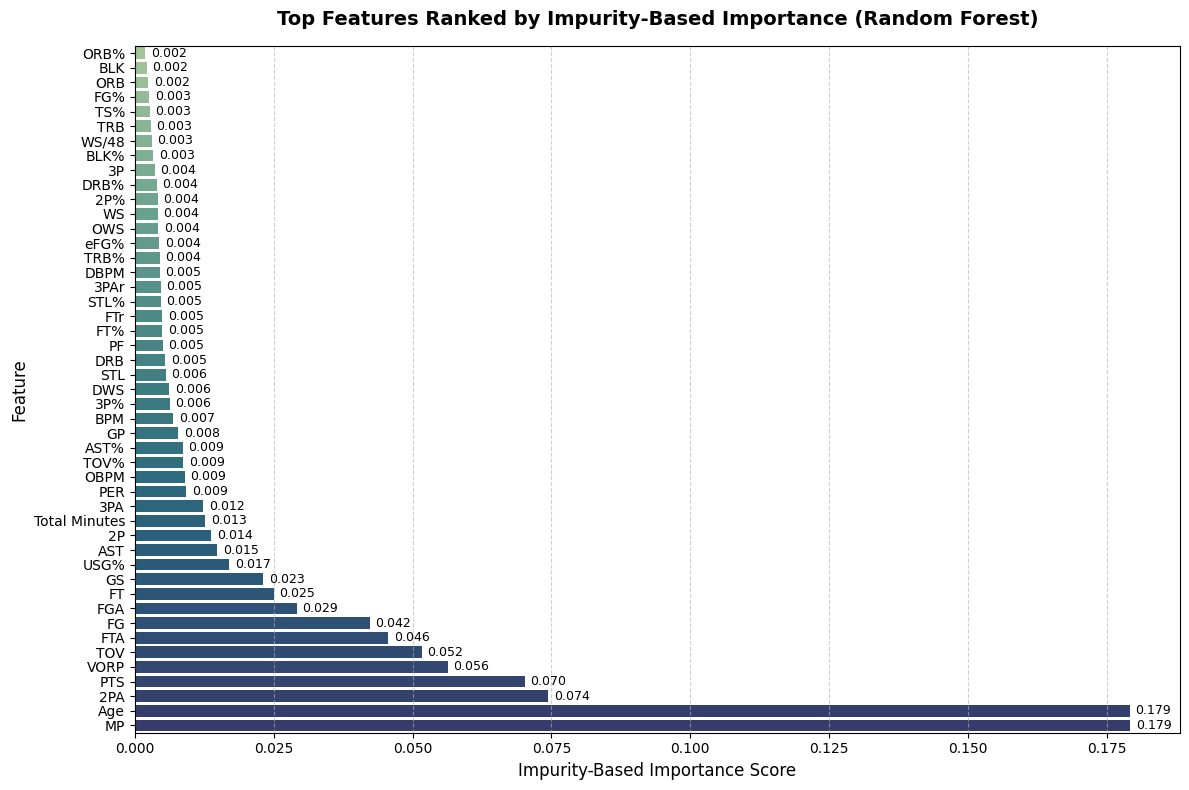

In [56]:
from sklearn.ensemble import RandomForestRegressor


# Step 1: Prepare data
X = df.select_dtypes(include='number').drop(columns=['Salary'])
y = df['Salary']

# Step 2: Train Random Forest Regressor
model = RandomForestRegressor(random_state=0)
model.fit(X, y)

# Extract feature importances
importance_scores = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance_scores
}).sort_values(by='Importance', ascending=True)

# Plotting the importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='crest')

plt.title('Top Features Ranked by Impurity-Based Importance (Random Forest)',
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Impurity-Based Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add numerical value to each bar
for i, score in enumerate(importance_df['Importance']):
    plt.text(score + 0.001, i, f'{score:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [74]:
# Rank by MI
mi_df['MI_Rank'] = mi_df['MI_Score'].rank(ascending=False)

# Rank by Random Forest
importance_df['RF_Rank'] = importance_df['Importance'].rank(ascending=False)

# Merge both
comparison_df = pd.merge(mi_df[['Feature', 'MI_Score', 'MI_Rank']],
                         importance_df[['Feature', 'Importance', 'RF_Rank']],
                         on='Feature')

# Compute absolute rank difference
comparison_df['Rank_Diff'] = (comparison_df['MI_Rank'] - comparison_df['RF_Rank']).abs()

# Sort by Rank Difference to highlight disagreements
comparison_df_sorted = comparison_df.sort_values(by='Rank_Diff', ascending=False)

# Print top features with biggest disagreements
print("Top 30 features with the biggest disagreement in ranking:")
print(comparison_df_sorted[['Feature', 'MI_Rank', 'RF_Rank', 'Rank_Diff']].head(20))

# Show common top features
top_mi = set(comparison_df.sort_values(by='MI_Rank').head(30)['Feature'])
top_rf = set(comparison_df.sort_values(by='RF_Rank').head(30)['Feature'])
common_top = top_mi & top_rf

print("\nCommon top features in both MI and RF (Top 30):")
print(common_top)


Top 30 features with the biggest disagreement in ranking:
          Feature  MI_Rank  RF_Rank  Rank_Diff
39           USG%     40.0     12.0       28.0
1             DWS      2.0     24.0       22.0
13            OWS     14.0     35.0       21.0
16             WS     17.0     36.0       19.0
34           TOV%     35.0     19.0       16.0
22             3P     23.0     39.0       16.0
44            FTr     45.0     29.0       16.0
46           DBPM     47.0     32.0       15.0
26            TRB     27.0     42.0       15.0
36            3P%     37.0     23.0       14.0
0   Total Minutes      1.0     15.0       14.0
6              GP      7.0     21.0       14.0
14            Age     15.0      2.0       13.0
32            BLK     33.0     46.0       13.0
45           TRB%     46.0     33.0       13.0
27            3PA     28.0     16.0       12.0
18            FTA     19.0      7.0       12.0
31            TS%     32.0     43.0       11.0
40           3PAr     41.0     31.0       10.0
35

🏀 Scoring Metrics:
PTS (Points): Total points scored; directly reflects offensive contribution.

FG (Field Goals Made): Successful shots from the field; indicates scoring efficiency.

FGA (Field Goals Attempted): Shot volume; higher values imply a central offensive role.

2P / 2PA (Two-Point Field Goals): Measures effectiveness inside the arc.

FT / FTA (Free Throws Made / Attempted): Free-throw performance and aggressiveness in drawing fouls.

⏱️ Play Time & Usage:
MP (Minutes Played): Indicates how long a player stays on court.

GP (Games Played): Total appearances; shows durability and availability.

GS (Games Started): Reflects the player’s role in the starting lineup.

Total Minutes: Total minutes played over the season; high correlation with team reliance.

📊 Advanced Metrics:
VORP (Value Over Replacement Player): Measures a player’s overall contribution compared to a baseline substitute.

OBPM (Offensive Box Plus/Minus): Captures the player's offensive impact relative to league average.

🎯 Playmaking & Ball Handling:
AST (Assists): Represents playmaking ability and team involvement.

TOV (Turnovers): Negative indicator; too many turnovers reduce player value.

👤 Personal Factors:
Age: May influence salary due to experience, prime years, or rookie contracts.



cheking the duplicates and remove them if they are existing 

In [58]:
def check_duplicates(df):
    
    
    # Count duplicates
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")
    
    # Remove duplicates
    df.drop_duplicates(inplace=True)

check_duplicates(df)
check_duplicates(df_add)


Number of duplicate rows: 0
Number of duplicate rows: 0


## Step 2: Split Features by Type

In [81]:

categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).drop('Salary', axis=1).columns.tolist()


 Exploratory Data Analysis (EDA)

In [82]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


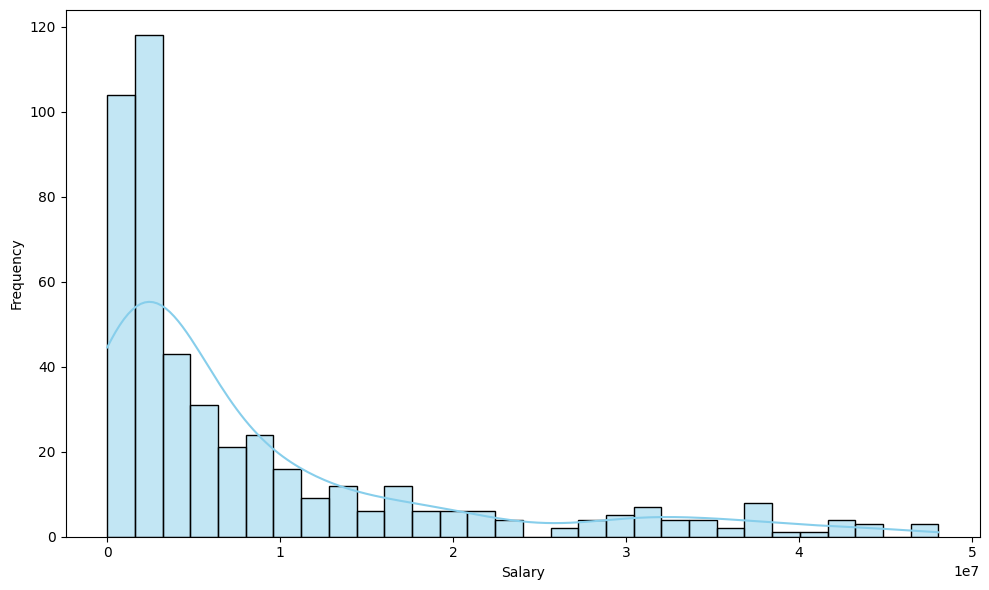

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot original salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], bins=30, kde=True, color='skyblue')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The distribution of the Salary variable was found to be highly right-skewed, with the majority of players earning under $10 million and a small number of outliers earning significantly more. This long-tail behavior can negatively impact the performance of regression models by introducing extreme values that distort the error metrics. To address this, a log transformation of the salary was applied to reduce skewness and bring the distribution closer to normal, which helps stabilize variance and improve model learning.



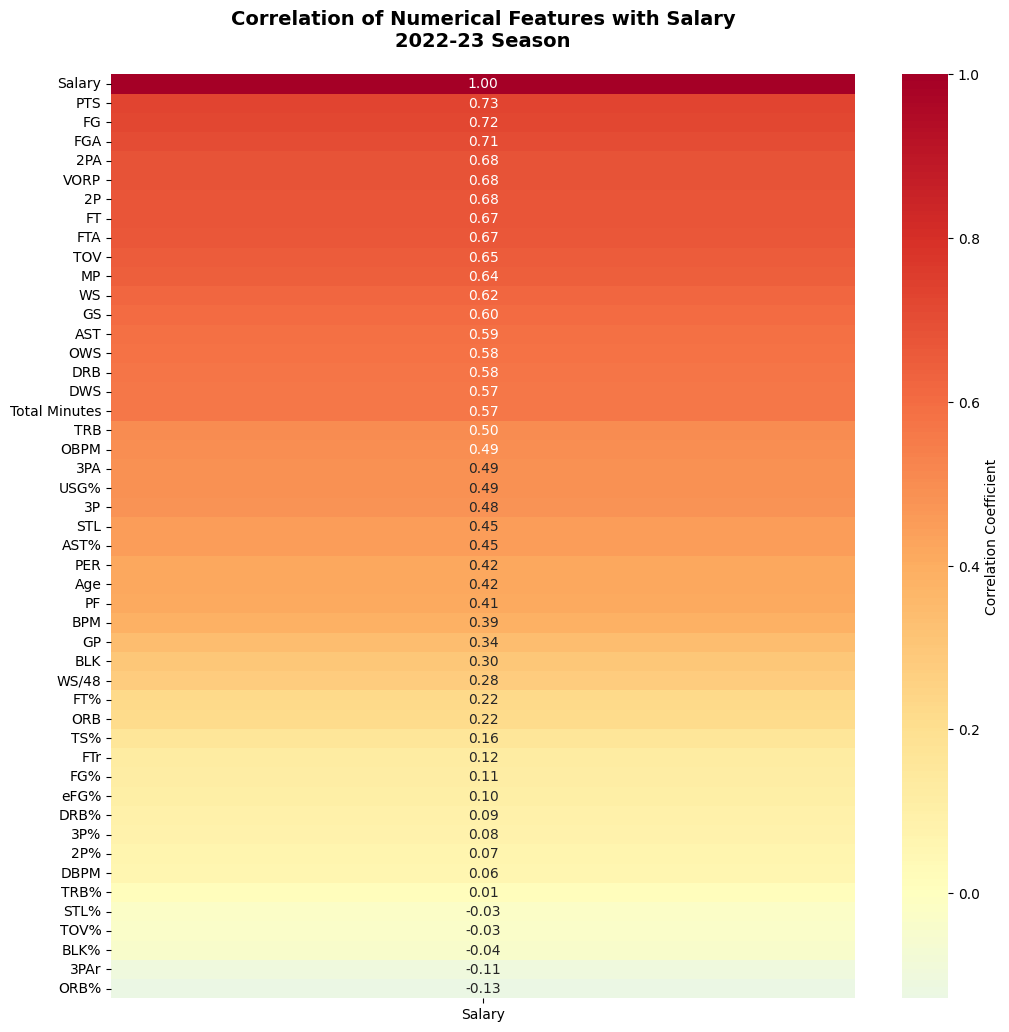

In [84]:
if 'Salary' not in numerical_features:
    numerical_features.append('Salary')

corr = df[numerical_features].corr()

plt.figure(figsize=(12, 12))

sns.heatmap(corr[['Salary']].sort_values(by='Salary', ascending=False),
            annot=True,
            fmt='.2f',
            cmap='RdYlBu_r',
            center=0,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title("Correlation of Numerical Features with Salary\n2022-23 Season",
          pad=20,
          fontsize=14,
          fontweight='bold')

plt.savefig('salary_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [85]:
# Print top 5 positive and negative correlations
print("\nTop 5 Positive Correlations with Salary:")
print(corr['Salary'].sort_values(ascending=False).head(6)[1:6])  # Skip Salary itself

print("\nTop 5 Negative Correlations with Salary:")
print(corr['Salary'].sort_values(ascending=True).head(6)) 


Top 5 Positive Correlations with Salary:
PTS     0.727251
FG      0.719915
FGA     0.706037
2PA     0.681442
VORP    0.680165
Name: Salary, dtype: float64

Top 5 Negative Correlations with Salary:
ORB%   -0.128522
3PAr   -0.106102
BLK%   -0.038071
TOV%   -0.034499
STL%   -0.025425
TRB%    0.009908
Name: Salary, dtype: float64


based on the correlation analysis, the features most positively associated with Salary are related to offensive performance. The top five include PTS (Points per Game), FG (Field Goals Made), FGA (Field Goal Attempts), 2PA (Two-Point Attempts), and VORP (Value Over Replacement Player). These indicate that players who score more and have a high offensive impact tend to earn significantly higher salaries. In particular, VORP captures a player’s overall contribution compared to a replacement-level player, further confirming the value of all-around performance.

On the other hand, features with the highest negative correlations are ORB% (Offensive Rebound Percentage), 3PAr (Three-Point Attempt Rate), TOV% (Turnover Percentage), BLK% (Block Percentage), and STL% (Steal Percentage). These metrics are generally related to defensive or specialized roles and show weaker or slightly negative associations with salary. This suggests that while these skills are important, they are not as highly rewarded in salary decisions as scoring and offensive efficiency.

In conclusion, scoring and advanced performance metrics are the strongest predictors of salary, while defensive stats have less influence on financial compensation in the NBA.



ترجمه:
ناءً على تحليل الارتباط، تبيّن أن الخصائص الأكثر ارتباطًا إيجابيًا مع Salary تتعلق بالأداء الهجومي. أهم خمسة متغيرات هي: PTS (عدد النقاط في كل مباراة)، FG (عدد التسديدات الناجحة)، FGA (عدد المحاولات للتسجيل)، 2PA (محاولات التسديد من داخل القوس)، وVORP (قيمة اللاعب مقارنةً بلاعب بديل). هذه النتائج تشير إلى أن اللاعبين الذين يسجلون أكثر ويؤدون دورًا هجوميًا كبيرًا يحصلون على رواتب أعلى بشكل واضح. خاصةً، يعكس مؤشر VORP مساهمة اللاعب الشاملة في الفريق، مما يؤكد أهمية الأداء المتكامل في تحديد الراتب.

في المقابل، أظهرت بعض المتغيرات ارتباطًا سلبيًا مع Salary، مثل: ORB% (نسبة المتابعة الهجومية)، 3PAr (نسبة تسديدات الثلاثيات)، TOV% (نسبة فقدان الكرة)، BLK% (نسبة الصدات)، وSTL% (نسبة السرقات). هذه الإحصائيات ترتبط غالبًا بالأدوار الدفاعية أو المتخصصة، وقد أظهرت ارتباطًا ضعيفًا أو سلبيًا بسيطًا مع الرواتب. وهذا يشير إلى أن هذه المهارات، رغم أهميتها، لا تُكافأ ماليًا بنفس مستوى مهارات التسجيل أو الفاعلية الهجومية.

الخلاصة: الأداء الهجومي والمؤشرات المتقدمة مثل PTS و VORP تُعد من أهم العوامل التي تؤثر في تحديد رواتب اللاعبين في الدوري، بينما تلعب الإحصائيات الدفاعية دورًا ثانويًا في هذا السياق.

Scatterplots were generated to explore the relationship between Salary and several positively correlated features (PTS, FG, FGA, 2PA, VORP), with Position used to color the data points.

Although the plots show logical trends between performance and salary, there were no clear or separate clusters of players. Player positions appeared heavily mixed, with no distinct grouping in the feature space.

Based on this, it was concluded that clustering techniques such as K-Means are not suitable for this dataset. The lack of natural separations between player groups means that clustering would not provide meaningful or interpretable results.



This code calculates the uniqueness ratio for each categorical feature — i.e., the proportion of unique values compared to the total number of rows.
A high uniqueness ratio (especially > 95%) suggests that the feature behaves more like an identifier than a useful predictor and it would not help while one hot encoded

The bar plot helps visually identify which categorical features have excessively unique values, with a red line marking the 0.95 threshold.



C:\Users\DELL\AppData\Local\Temp\ipykernel_20432\1160787783.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_ratio.values, y=unique_ratio.index, palette='coolwarm')


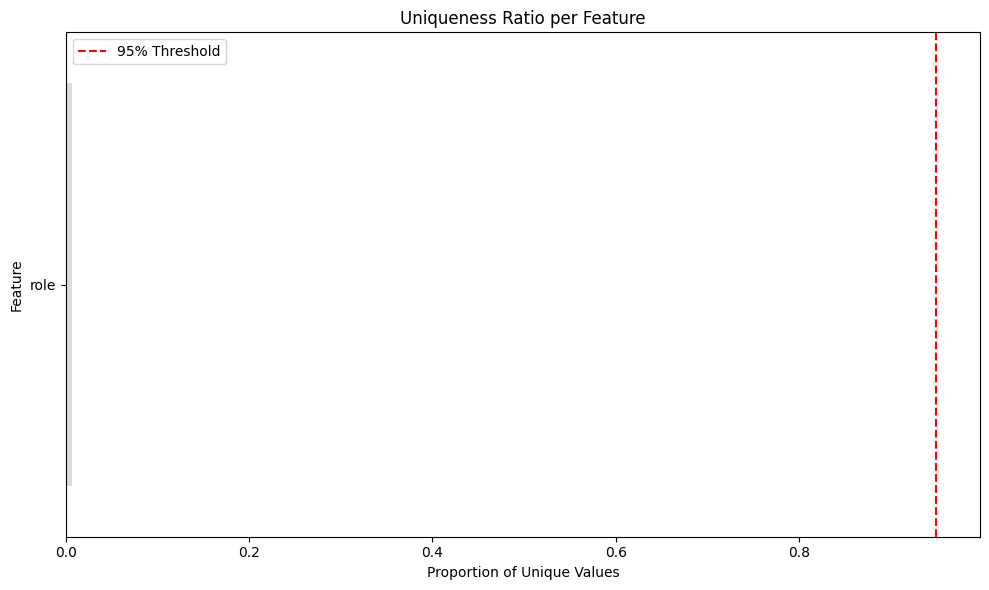

In [86]:
unique_ratio = df[categorical_features].apply(lambda x: x.nunique() / len(df)).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_ratio.values, y=unique_ratio.index, palette='coolwarm')
plt.xlabel("Proportion of Unique Values")
plt.ylabel("Feature")
plt.title("Uniqueness Ratio per Feature")
plt.axvline(0.95, color='red', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

ماحظه
remove team too عشان هتتعب في اتقسيم بعدين

In [87]:
df.drop('Player Name', axis=1, inplace=True)
df.drop('Team', axis=1, inplace=True)

categorical_features = [col for col in categorical_features if col != 'Player Name']

KeyError: "['Player Name'] not found in axis"

To identify numerical features that may not contribute meaningful information to the predictive model, the following code was used.
This snippet calculates the standard deviation for each numerical feature in the dataset. A very low standard deviation (in this case, less than 0.01) indicates that a feature has almost the same value across all rows, i.e., it lacks variability.



C:\Users\DELL\AppData\Local\Temp\ipykernel_20432\3899147909.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Position', y='Salary', data=avg_salary_by_position, palette='Set2', order=avg_salary_by_position['Position'])


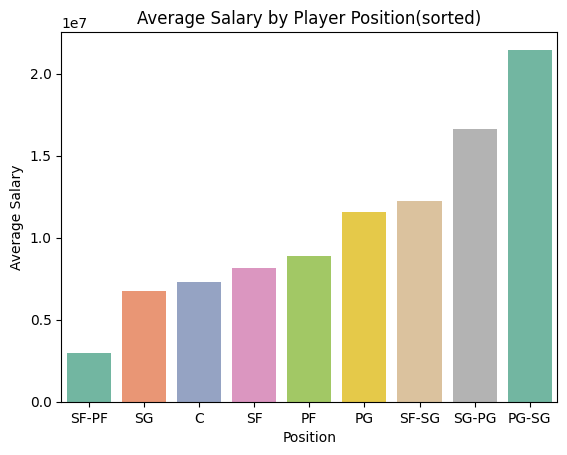

In [ ]:
avg_salary_by_position = df.groupby('Position')['Salary'].mean().reset_index()
avg_salary_by_position = avg_salary_by_position.sort_values(by='Salary', ascending=True)

sns.barplot(x='Position', y='Salary', data=avg_salary_by_position, palette='Set2', order=avg_salary_by_position['Position'])
plt.title('Average Salary by Player Position(sorted)')
plt.ylabel('Average Salary')
plt.xlabel('Position')
plt.show()

In [67]:
print(df['Position'].unique())


['PG' 'PF' 'SG' 'SF' 'PG-SG' 'C' 'SF-SG' 'SG-PG' 'SF-PF']


general to two catogories


In [68]:
# Define the generalization mapping from position to role
position_to_role = {
    'PG': 'Midfield',        # Primary playmaker
    'SG': 'Attack',          # Main scorer
    'SF': 'Attack',          # Versatile offensive wing
    'PF': 'Defense',         # Strong defensive forward
    'C': 'Defense',          # Rim protector and rebounder
    'PG-SG': 'Midfield',     # Hybrid, more of a playmaker
    'SG-PG': 'Attack',       # Hybrid, more of a scorer
    'SF-SG': 'Attack',       # Agile offensive wing
    'SF-PF': 'Defense'       # Physically strong defensive wing
}

# Create a new column with generalized roles
df['role'] = df['Position'].map(position_to_role)


 1. Attack
1. SG – Shooting Guard
Classification: Attack

Reason: The primary role is scoring, especially from long range. SGs are typically among the top scorers on the team and excel at creating their own shots.

2. SF – Small Forward
Classification: Attack

Reason: A versatile offensive wing who scores from all areas, drives to the basket, and helps stretch the defense. Often the second or third leading scorer on the team.

3. SG-PG – Shooting Guard / Point Guard
Classification: Attack

Reason: While capable of playmaking, this hybrid role leans toward scoring. Used primarily as a secondary or even primary scorer.

4. SF-SG – Small Forward / Shooting Guard
Classification: Attack

Reason: Combines two offensive wing positions. Fast and skilled, operates on the perimeter to create scoring opportunities and spacing.

 2. Midfield (Playmaking)
5. PG – Point Guard
Classification: Midfield

Reason: The tactical leader on the court. Responsible for setting up plays, managing tempo, and distributing the ball—most possessions start with the PG.

6. PG-SG – Point Guard / Shooting Guard
Classification: Midfield

Reason: A hybrid role that blends playmaking with scoring, but typically starts and functions as a playmaker who facilitates the offense.

3. Defense
7. PF – Power Forward
Classification: Defense

Reason: Operates near the basket, focuses on defensive rebounds, guarding bigger opponents, and helping close off the paint area.

8. C – Center
Classification: Defense

Reason: The team’s rim protector. Main responsibilities include blocking shots, defending the paint, and grabbing defensive boards.

9. SF-PF – Small Forward / Power Forward
Classification: Defense

Reason: Though starting as a wing, this hybrid role involves physical defense against strong forwards or post players. Offensive involvement is secondary to defensive duties, especially against taller matchups.

In [69]:
df['role'].describe()

count        466
unique         3
top       Attack
freq         209
Name: role, dtype: object

In [70]:
df.drop(columns=['Position'], inplace=True)


Ast ans ast% are some how the same so we will keep one of them
MP, Total Minutes, GP, GS : give as the same thing so we will keep the total minutes as it is better indactor
FTA and FTA% give us the same thing so we will keep just ine of them 


corr heat map with each others
high corr will be removed

              TOV          PF        VORP         DWS         AST         STL  \
count  466.000000  466.000000  466.000000  466.000000  466.000000  466.000000   
mean     1.112232    1.704292    0.540987    1.122961    2.112232    0.611803   
std      0.829925    0.777107    1.173953    0.980152    1.957176    0.398506   
min      0.000000    0.000000   -1.300000    0.000000    0.000000    0.000000   
25%      0.500000    1.200000   -0.100000    0.300000    0.800000    0.300000   
50%      0.900000    1.700000    0.100000    0.900000    1.400000    0.600000   
75%      1.500000    2.200000    0.800000    1.800000    2.900000    0.800000   
max      4.100000    5.000000    6.400000    4.800000   10.700000    3.000000   

             OBPM         PTS         BPM         FGA  Total Minutes  \
count  466.000000  466.000000  466.000000  466.000000     466.000000   
mean    -1.302146    9.149571   -1.378755    7.133047    1112.047210   
std      3.460175    6.900423    4.791166    5.015222 

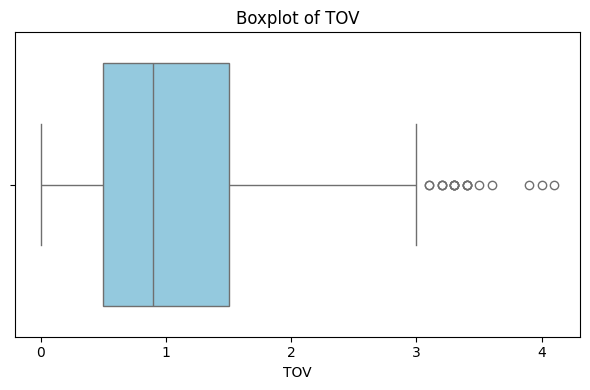

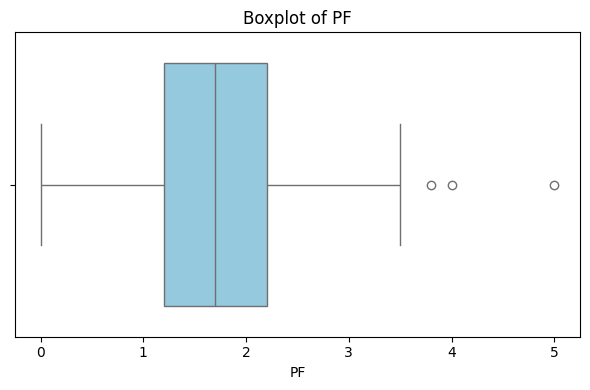

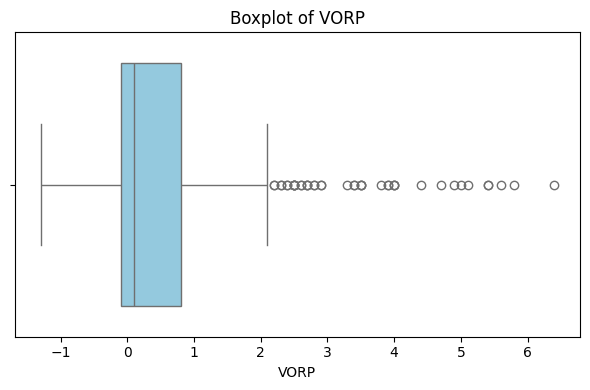

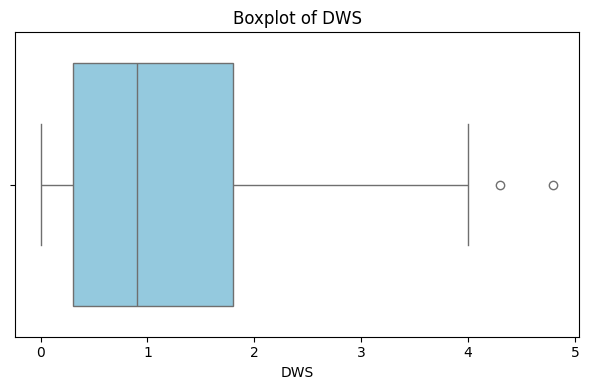

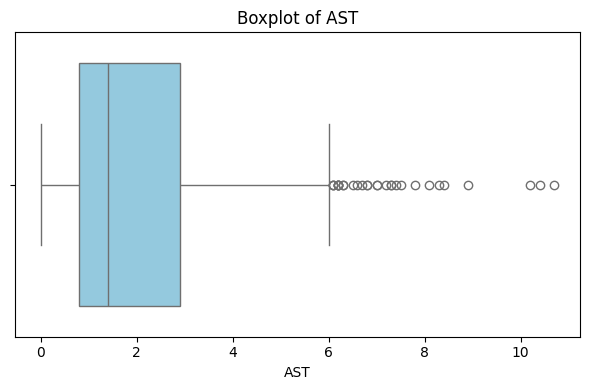

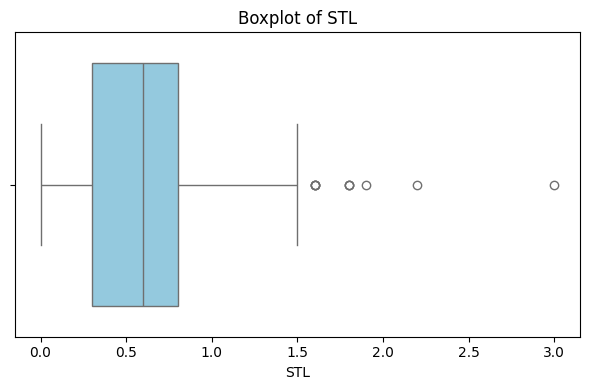

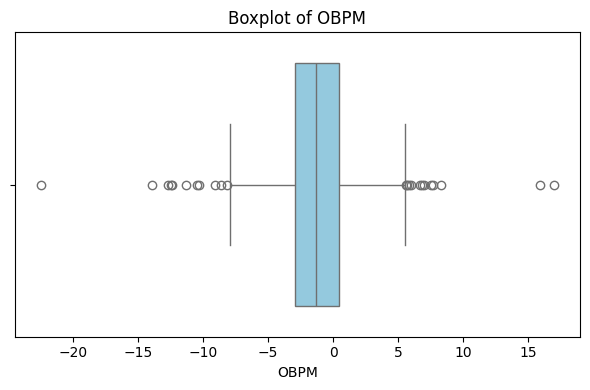

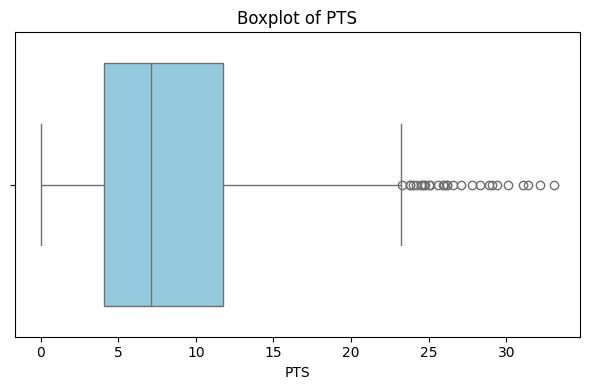

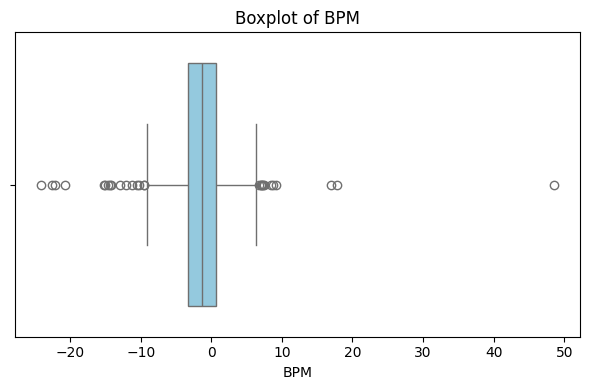

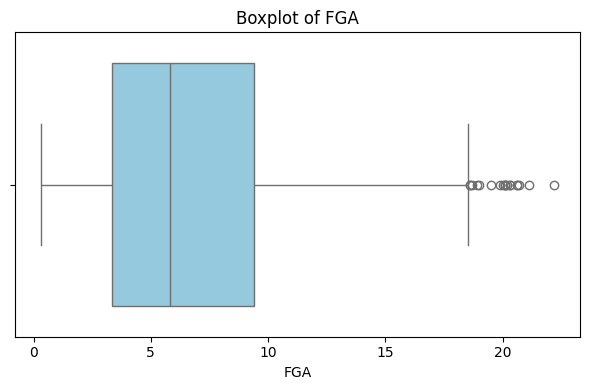

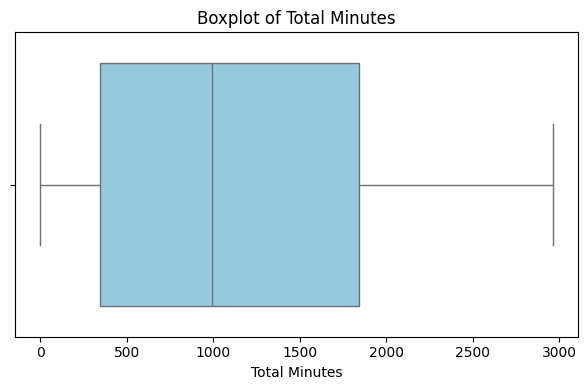

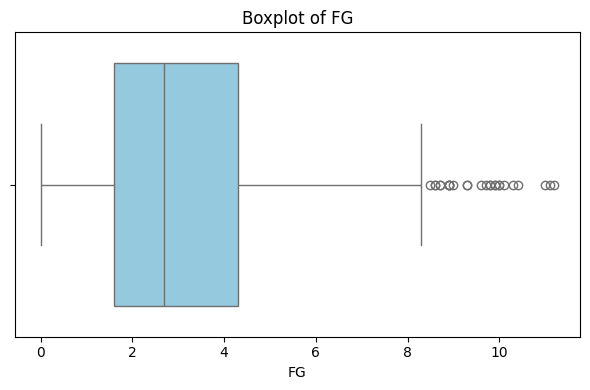

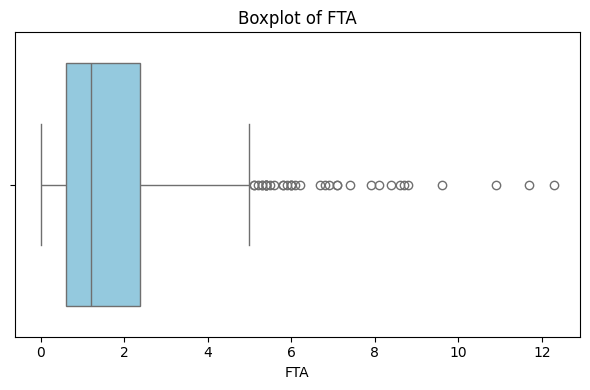

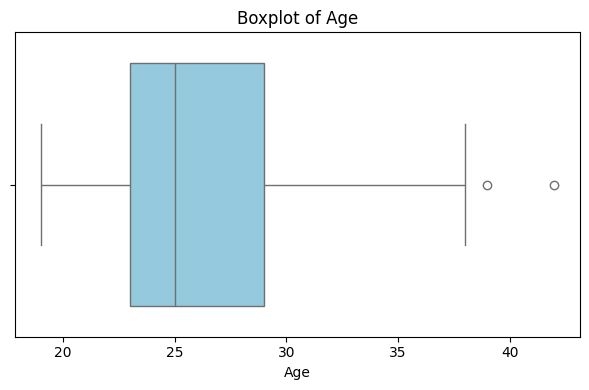

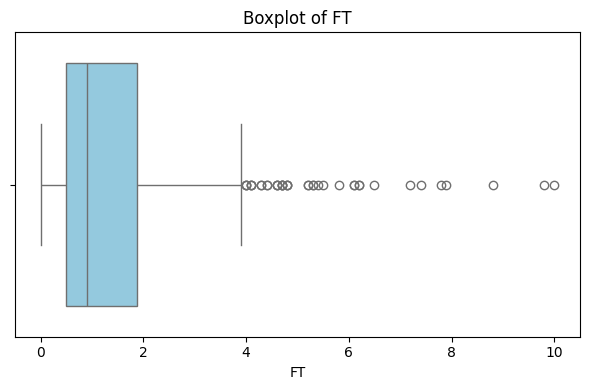

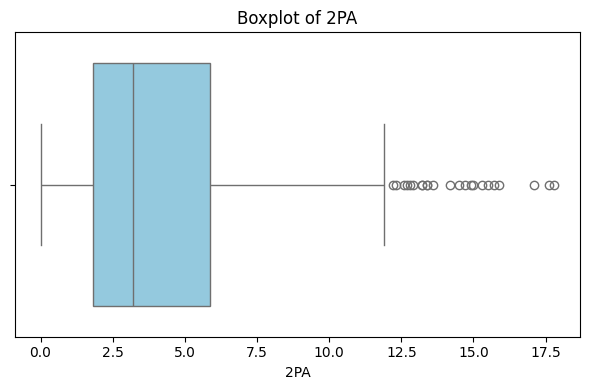

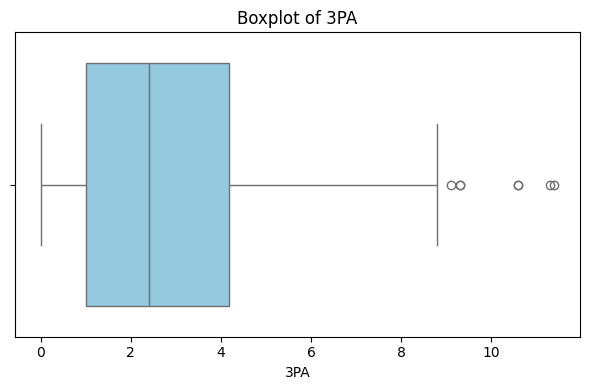

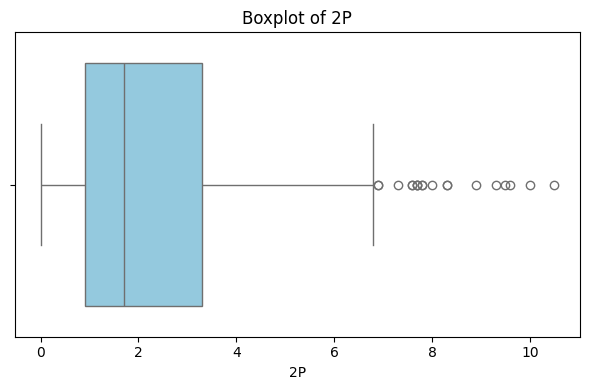

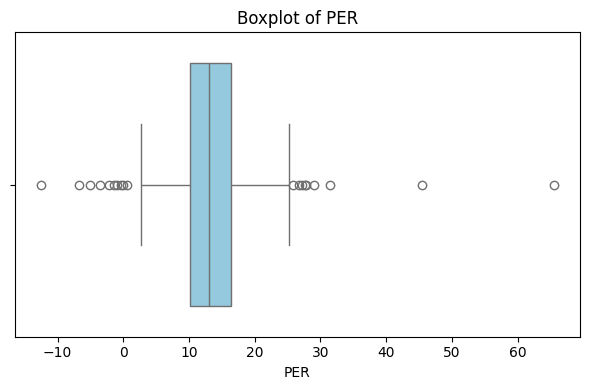

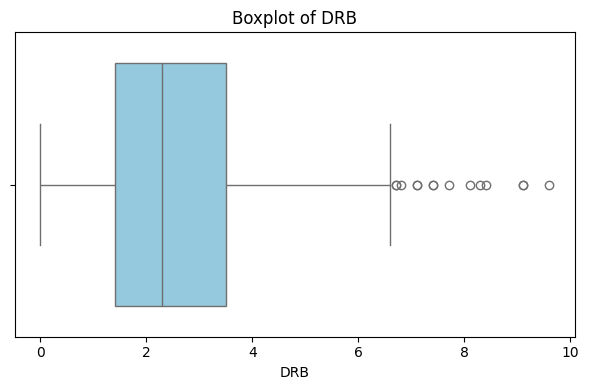

In [ ]:

# List of selected features
selected_features = ['TOV', 'PF', 'VORP', 'DWS', 'AST', 'STL', 'AST%',
                       'MP', 'OBPM', 'PTS', 'BPM', 'FGA', 'Total Minutes',
                         'FG', 'FTA', 'Age', 'FT', '2PA', '3PA', 'FT%', '2P', 'GS', 'PER', 'GP', 'DRB']

# 1. Descriptive Statistics
print(df[selected_features].describe())

# 2. Boxplots for visual outlier detection
for col in selected_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()
